<AxesSubplot:title={'center':'Vendas por ano\n'}, xlabel='Data Venda'>

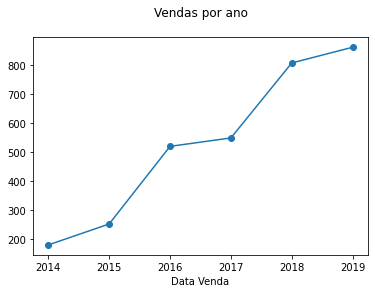

In [30]:
# Armstrong Lohãns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.patches as mpatches


dados = pd.read_csv("Vendas.csv", encoding = "iso-8859-1", sep = ";")

# Letra A

# Total de vendas por ano
# Dados agrupados pelo ano, no parametro do groupby() foi passado todos as datas, 
# que antes foi convertido para datetime para poder pegar o ano somente.
total_vendas_por_ano = dados.groupby(pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year).size()
total_vendas_por_ano.plot(marker="o", title="Vendas por ano\n")



<AxesSubplot:title={'center':'Vendas por categoria\n'}, xlabel='Categoria'>

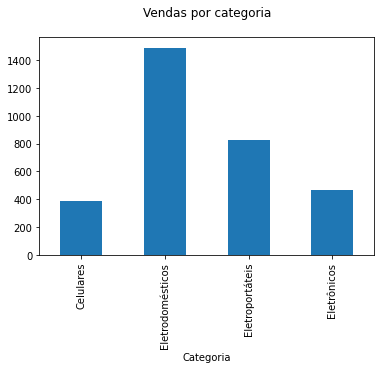

In [90]:
# Letra B

# Total de vendas por categoria
# Dados agrupados pela categoria, no parametro do groupby() foi passado todas as categorias, 
# e convertido para um gráfico em barra para melhor visualização.
total_vendas_por_categoria = dados.groupby(dados["Categoria"]).size()
total_vendas_por_categoria.plot(kind='bar', title="Vendas por categoria\n")


# dados.head()

<AxesSubplot:title={'center':'Vendas por categoria por ano\n'}, xlabel='Categoria'>

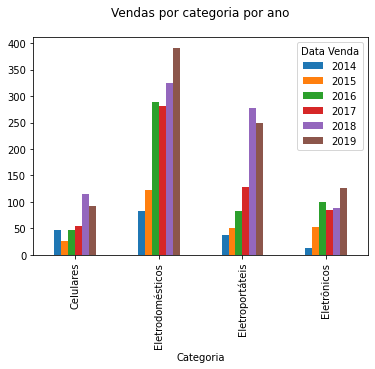

In [62]:
# Letra C

# Total de vendas por categoria por ano
# Dados agrupados pela categoria e por ano, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/categorias para ficar mais legível.
total_vendas_por_categoria_por_ano = dados.groupby([pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year, dados["Categoria"]]).size()
total_vendas_por_categoria_por_ano = total_vendas_por_categoria_por_ano.unstack(level=0).fillna(0)

total_vendas_por_categoria_por_ano.plot(kind='bar', title="Vendas por categoria por ano\n", )

# dados.head()

<AxesSubplot:title={'center':'Vendas por ano e categoria\n'}, xlabel='Data Venda'>

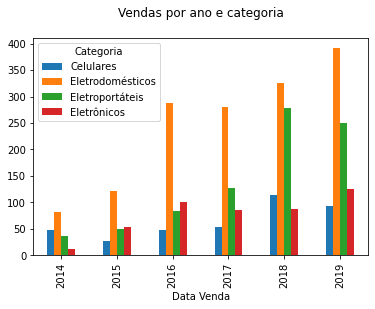

In [5]:
# Letra D

# Total de vendas por ano e categoria
# Dados agrupados pela categoria e por ano, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/categorias para ficar mais legível.
total_vendas_por_ano_e_categoria = dados.groupby([dados["Categoria"], pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year]).size()
total_vendas_por_ano_e_categoria = total_vendas_por_ano_e_categoria.unstack(level=0).fillna(0)

total_vendas_por_ano_e_categoria.plot(kind='bar', title="Vendas por ano e categoria\n", )

# dados.head()

<AxesSubplot:title={'center':'Vendas por categoria pelos meses para cada ano\n'}, ylabel='Categoria,Data Venda'>

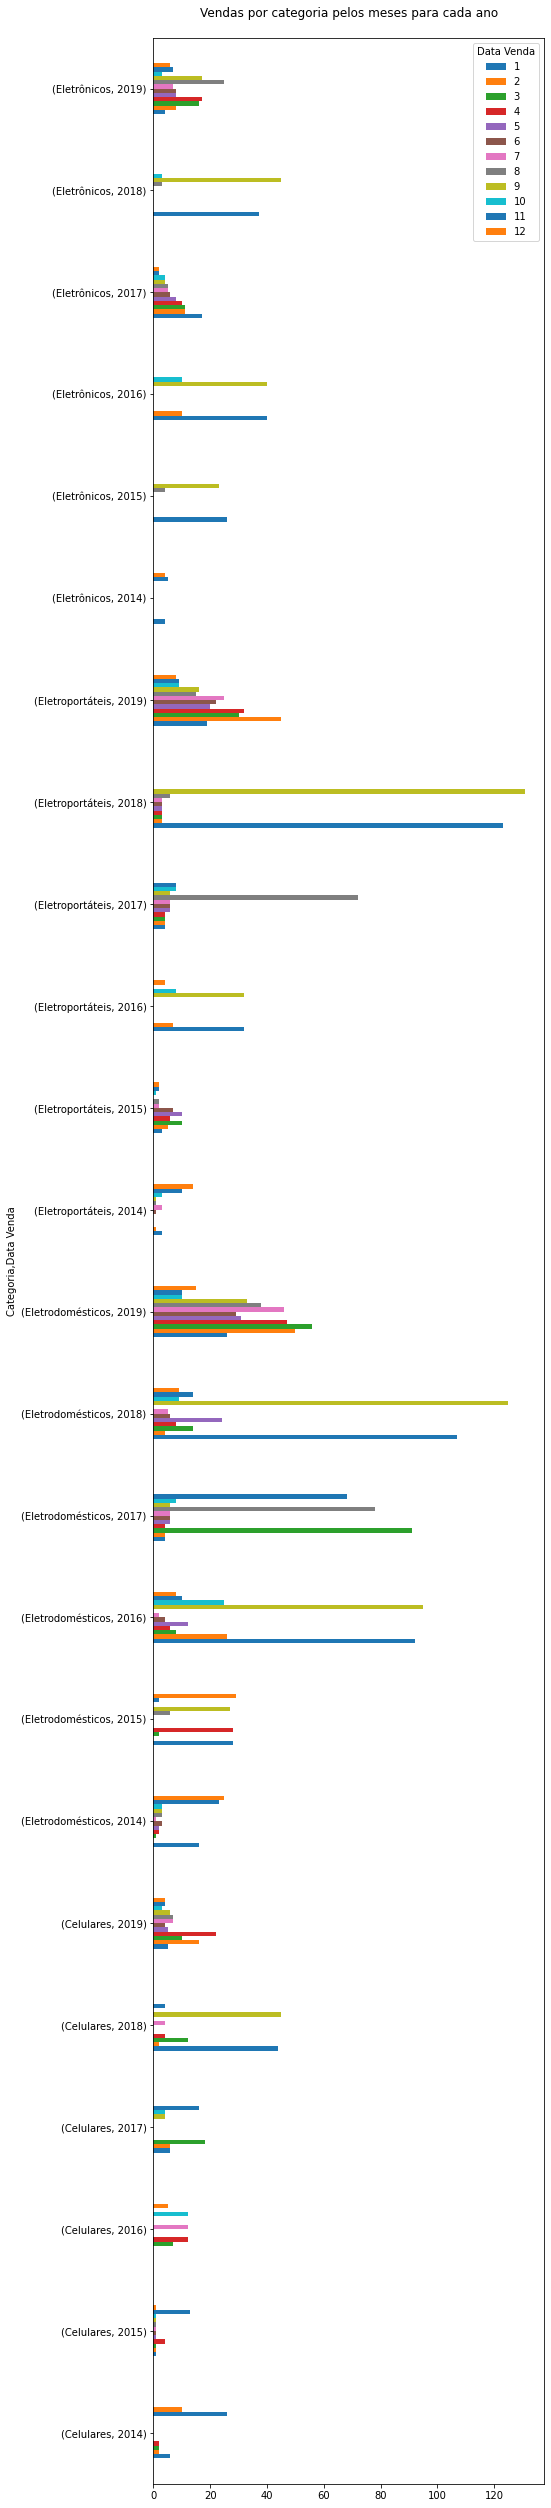

In [81]:
# Letra E

# Total de vendas por categoria pelos meses para cada ano
# Dados agrupados pela categoria e por ano e demonstrados por meses, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/meses/categorias para ficar mais legível.
total_vendas_por_categoria_pelos_meses_para_cada_ano = dados.groupby([dados["Categoria"], pd.to_datetime(dados["Data Venda"], errors='coerce').dt.month, pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year]).size()
total_vendas_por_categoria_pelos_meses_para_cada_ano = total_vendas_por_categoria_pelos_meses_para_cada_ano.unstack(level=1).fillna(0)

total_vendas_por_categoria_pelos_meses_para_cada_ano.plot(kind='barh', figsize= (7,45), title="Vendas por categoria pelos meses para cada ano\n")
# dados.head()



Produto mais vendido por cada fabricante:
                     Produto  Vendas  Fabricante
0                 Fritadeira   158.0        Arno
1           Geladeira Duplex   457.0    Brastemp
2                  Aspirador   413.0    Britânia
3           Geladeira Duplex   249.0      Consul
4         Notebook Dell 8 GB    65.0        Dell
5             Lavadora 11 Kg    33.0  Electrolux
6         Impressora Deskjet   118.0       Epson
7         Impressora Deskjet   194.0          HP
8            LG K10 TV Power     4.0          LG
9           Morotola Moto G5   207.0    Motorola
10               Micro-Ondas   127.0   Panasonic
11  Processador de Alimentos    68.0      Philco
12          Samsung Galaxy 8   160.0     Samsung
13           Sony Experia XA    14.0        Sony


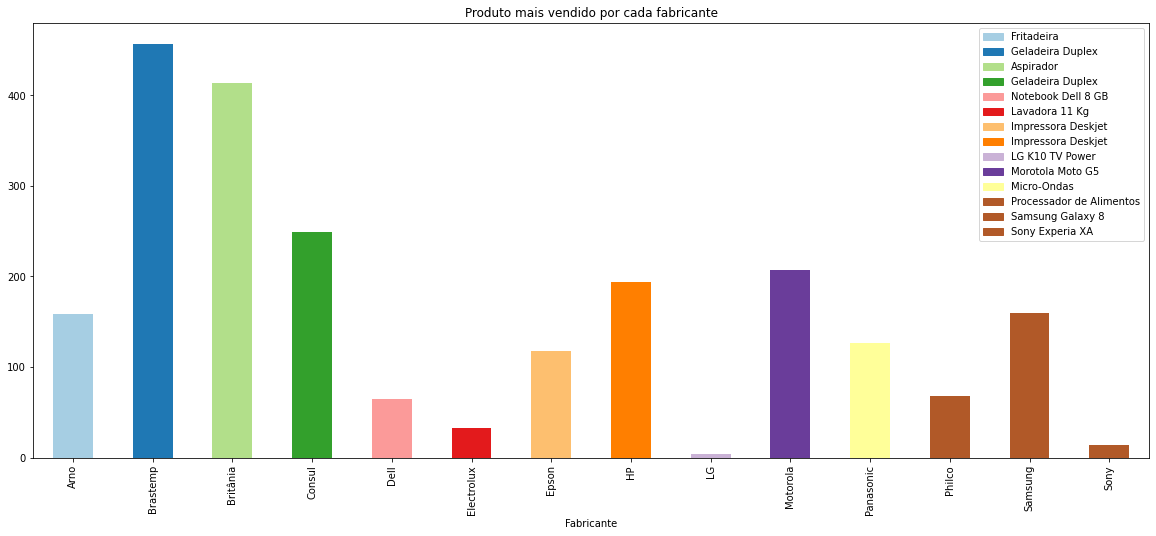

In [74]:
# Letra F

# Produto mais vendido por cada fabricante

import matplotlib.patches as mpatches
import numpy as np

produto_mais_vendido_por_fabricante = dados.groupby([dados["Produto"], dados["Fabricante"]]).size()


produto_mais_vendido_por_fabricante = produto_mais_vendido_por_fabricante.unstack(level=1).fillna(0)


# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_vendido_por_fabricante_produtos = produto_mais_vendido_por_fabricante.idxmax()
df_produto_mais_vendido_por_fabricante_produtos = produto_mais_vendido_por_fabricante.idxmax().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_vendido_por_fabricante_total_vendas = produto_mais_vendido_por_fabricante.max()
df_produto_mais_vendido_por_fabricante_total_vendas = produto_mais_vendido_por_fabricante.max().to_frame()

# Junção de ambos
df_produto_mais_vendido_por_fabricante_produtos[1] = df_produto_mais_vendido_por_fabricante_total_vendas


lista = df_produto_mais_vendido_por_fabricante_produtos.values.tolist()

# Atualização nos indices do dataframe e atrinuição de cores únicas para legenda
nome_produtos = []
cores = plt.cm.Paired(np.arange(len(lista)))

for k in range(len(lista)):
    lista[k].append(produto_mais_vendido_por_fabricante_total_vendas.keys()[k])
    nome_produtos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(df_lista)))[k], label=produto_mais_vendido_por_fabricante_produtos[k]))

# Finalização do dataframe
df_lista = pd.DataFrame(lista,columns=['Produto', 'Vendas', 'Fabricante'])

print("Produto mais vendido por cada fabricante:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (20,8), use_index = True, x = 'Fabricante', color=[cores], title = 'Produto mais vendido por cada fabricante').legend(handles=nome_produtos)

<AxesSubplot:title={'center':'Vendas das lojas por categoria\n'}, xlabel='Categoria'>

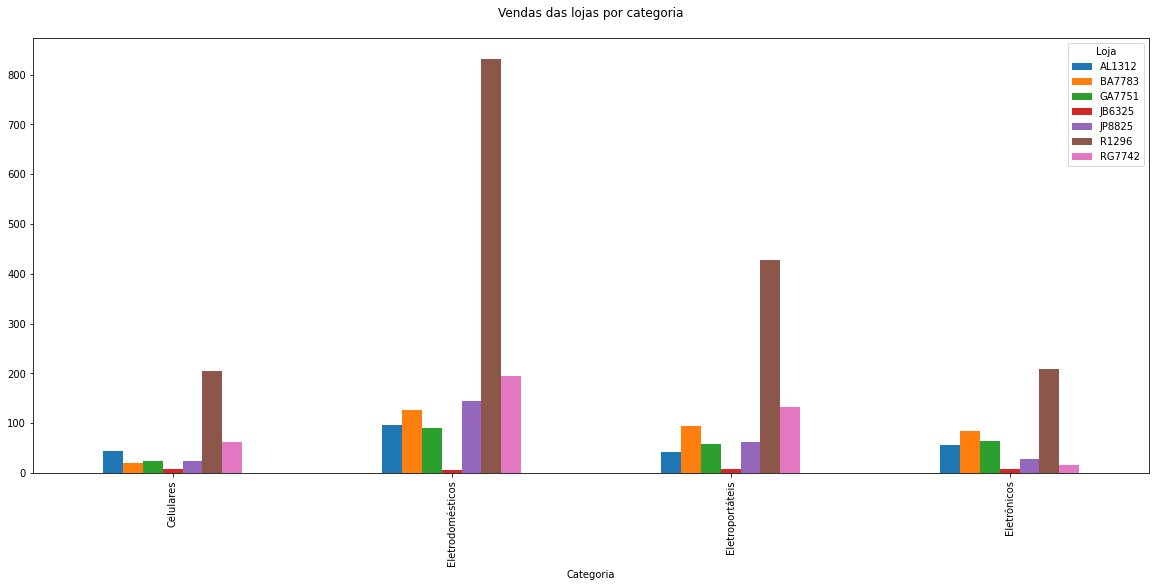

In [79]:
# Letra G

# Faça um gráfico das vendas das lojas por categoria

total_vendas_por_ano_e_categoria = dados.groupby([dados["Loja"], dados["Categoria"]]).size()
total_vendas_por_ano_e_categoria = total_vendas_por_ano_e_categoria.unstack(level=0).fillna(0)

total_vendas_por_ano_e_categoria.plot(kind='bar', figsize= (20,8), title="Vendas das lojas por categoria\n")


<AxesSubplot:title={'center':'Ranking de venda geral de produtos\n'}, xlabel='Produto'>

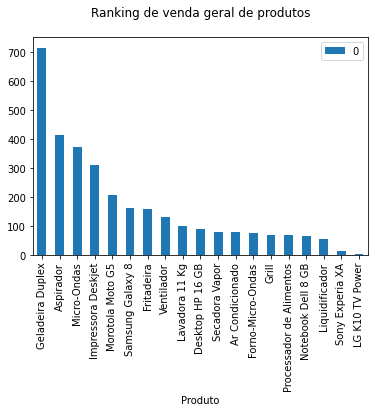

In [107]:
# Letra H (esepcífico para estudo) - venda geral de produtos

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

venda_geral = dados.groupby([dados["Produto"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=False)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral de produtos\n",)

<AxesSubplot:title={'center':'Ranking de venda geral por loja\n'}, xlabel='Loja'>

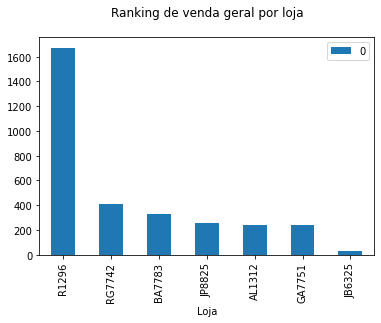

In [109]:
# Letra H (esepcífico para estudo) - venda geral por loja

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

venda_geral = dados.groupby([dados["Loja"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=False)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral por loja\n",)

Ranking dos produtos com maiores vendas no geral e por loja:
              Produto  Vendas    Loja
5    Geladeira Duplex   403.0   R1296
6         Micro-Ondas   127.0  RG7742
4    Geladeira Duplex    82.0  JP8825
1  Impressora Deskjet    78.0  BA7783
0    Geladeira Duplex    76.0  AL1312
2  Impressora Deskjet    56.0  GA7751
3  Notebook Dell 8 GB     7.0  JB6325


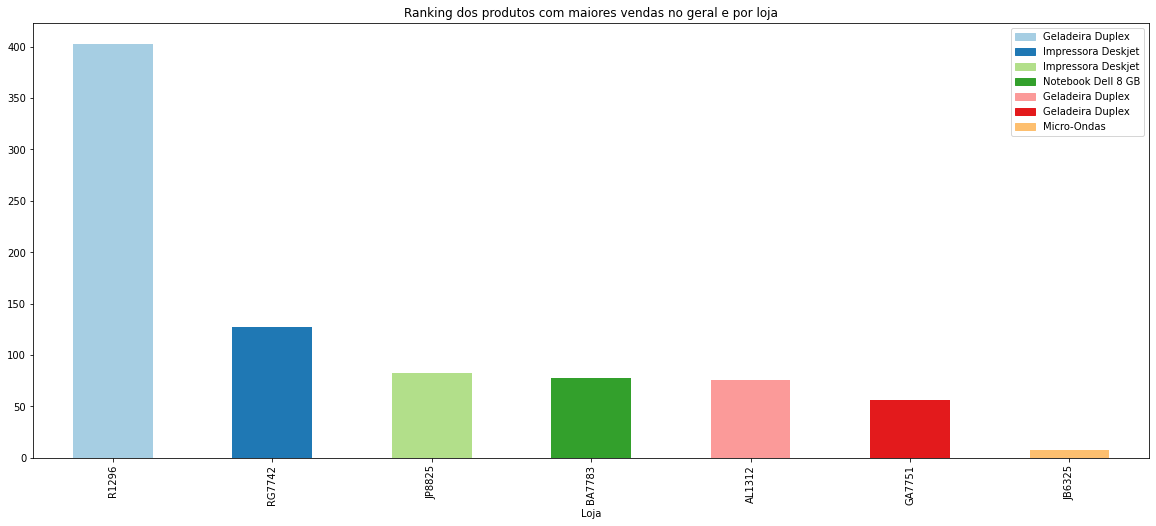

In [130]:
# Letra H

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

import matplotlib.patches as mpatches
import numpy as np

venda_geral = dados.groupby([dados["Produto"], dados["Loja"]]).size()


venda_geral = venda_geral.unstack(level=1).fillna(0)


# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmax()
df_produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmax().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_vendido_por_fabricante_total_vendas = venda_geral.max()
df_produto_mais_vendido_por_fabricante_total_vendas = venda_geral.max().to_frame()

# Junção de ambos
df_produto_mais_vendido_por_fabricante_produtos[1] = df_produto_mais_vendido_por_fabricante_total_vendas


lista = df_produto_mais_vendido_por_fabricante_produtos.values.tolist()

# Criação de dados para legenda
nome_produtos = []
cores = plt.cm.Paired(np.arange(len(lista)))

# Atualização nos indices do dataframe e atrinuição de cores únicas para legenda
for k in range(len(lista)):
    lista[k].append(produto_mais_vendido_por_fabricante_total_vendas.keys()[k])
    nome_produtos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(df_lista)))[k], label=produto_mais_vendido_por_fabricante_produtos[k]))

# Finalização do dataframe
df_lista = pd.DataFrame(lista, columns=['Produto', 'Vendas', 'Loja'])
df_lista = df_lista.sort_values(by=['Vendas'], ascending=False) #Ordenação decrescente

print("Ranking dos produtos com maiores vendas no geral e por loja:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (20,8), use_index = True, x = 'Loja', color=[cores], title = 'Ranking dos produtos com maiores vendas no geral e por loja').legend(handles=nome_produtos)